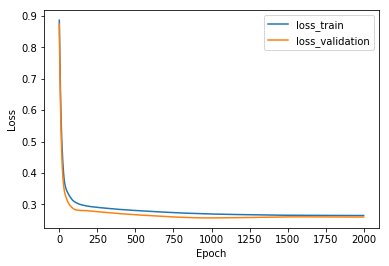

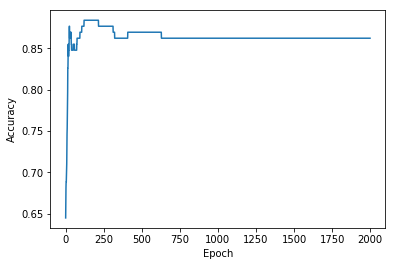

0.264798305867
0.259987675741
0.86231884058


In [2]:
from sklearn import datasets
import numpy as np
from scipy.sparse import csr_matrix, hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


def data_loader(file):
    X,Y = datasets.load_svmlight_file(file)
    one = np.ones((X.shape[0],1))
    X = hstack( [X, csr_matrix(one)] ).toarray()
    Y = np.array(Y).reshape(X.shape[0],1)
    return X, Y

def train(X_train, Y_train, learning_rate, theta, C=0.9):
    X =  (1 - Y_train * X_train.dot(theta) < 0)
    Y = Y_train.copy()
    Y[X] = 0
    E_gradient = -np.dot(X_train.transpose(), Y)  
    gradient = theta + C * E_gradient
    theta -= learning_rate * gradient
    return theta 

def loss_function(X, Y, theta, C):
    E_loss = 1 - Y * X.dot(theta)
    E_loss[E_loss<0] = 0
    loss = 0.5 * np.dot(theta.transpose(), theta).sum() + C * E_loss.sum()
    return loss/X.shape[0]

def accuracy_rate(X, Y, theta, threshold=0):
    Y_prediction = X.dot(theta)
    Y_prediction[Y_prediction < threshold] = -1
    Y_prediction[Y_prediction >= threshold] = 1
    C_matrix = Y*Y_prediction
    C_matrix[C_matrix==-1] = 0
    accuracy = C_matrix.sum()/C_matrix.shape[0]
    return accuracy

def plt_loss(learning_rate,epoch,C,threshold):
    X, Y = data_loader('australian.txt')
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    train_loss = []
    test_loss = []
    test_accuracy = []
    theta = np.random.random((X.shape[1],1))
    for t in range(epoch):      
        theta = train(X_train, Y_train, learning_rate, theta,C)
        Loss = loss_function(X_train, Y_train, theta, C)
        train_loss.append(Loss)
        loss = loss_function(X_test, Y_test, theta, C)
        test_loss.append(loss)   
        accuracy = accuracy_rate(X_test, Y_test, theta, threshold)
        test_accuracy.append(accuracy)  
    plt.figure(1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(train_loss, label="loss_train")
    plt.plot(test_loss, label="loss_validation")
    plt.legend(loc='upper right')

    plt.figure(2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(test_accuracy)
    plt.show()
    print(Loss)
    print(loss)
    print(accuracy)

if __name__ =="__main__":
    learning_rate = 0.0001
    C = 0.9
    epoch = 2000
    threshold = 0
    plt_loss(learning_rate=learning_rate, epoch=epoch, C=C, threshold=threshold)
